In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from fnn_helper import PlotLosses

import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

Using TensorFlow backend.


# Admisión de estudiantes para el ingreso a UCLA

Dataset Contiene 4 columnas:

Admit: 1 si fue admitido, 0 si no fue admitido

GRE Scores (Graduate Record Examination): Examen usual de admisión para la escuela de grado (0 a 800)

GPA Scores (Grades): Promedio de Grado. (0 a 4)

Class rank (1-4): Indice comparativo entre alumnos del mismo curso. (1,2,3,4)

# Importo el dataset

In [3]:
data = pd.read_csv('admision-estudiantes.csv')
data[:10]

,admit,gre,gpa,rank
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
7,0,400.0,3.08,2.0
8,1,540.0,3.39,3.0
9,0,700.0,3.92,2.0


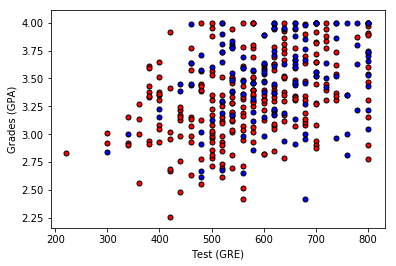

In [4]:
def plot_points(data):
    X = np.array(data[["gre","gpa"]])
    y = np.array(data["admit"])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'blue', edgecolor = 'k')
    plt.xlabel('Test (GRE)')
    plt.ylabel('Grades (GPA)')
plot_points(data)
plt.show()

In [5]:
# remove NaNs
data = data.fillna(0)

X = np.array(data[["gre","gpa","rank"]])
y = np.array(data["admit"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15, random_state=8)

# Regresión Logística

In [6]:
clf_logistic = LogisticRegression()
clf_logistic.fit(X_train, y_train)
train_score_logistic = clf_logistic.score(X_train, y_train)
test_score_logistic = clf_logistic.score(X_test, y_test)
print(train_score_logistic, test_score_logistic)
print()
print(clf_logistic.intercept_)
print(clf_logistic.coef_)

0.717647058824 0.633333333333

[-0.96354844]
[[ 0.00194712  0.09410445 -0.56653198]]


# Naive Bayes

In [7]:
clf_NB = GaussianNB()
clf_NB.fit(X_train, y_train)
train_score_NB = clf_NB.score(X_train, y_train)
test_score_NB = clf_NB.score(X_test, y_test)

print(train_score_NB, test_score_NB)

0.723529411765 0.683333333333


# Feedforward Neural Network

## Defino la arquitectura

**Pruebas**:
- No normalizar
- SGD o ADAM default
- Variar lr
- Variar momentum
- Variar initializers
- Quien logra entrenar en el menor tiempo
- Cambiar Batch size Relación de compromiso 
- Variar cantidad de neuronas en cada capa
- Variar cantidad de capas

In [8]:
data = pd.read_csv('admision-estudiantes.csv')
# remove NaNs
data = data.fillna(0)

X = np.array(data[["gre","gpa","rank"]])
y = np.array(data["admit"])

# Normalize
def normalize(X):
    X[:,0] = X[:,0]/X[:,0].max() 
    X[:,1] = X[:,1]/X[:,1].max()
    X[:,2] = X[:,2]/X[:,2].max()
    return X
X = normalize(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15, random_state=8)

In [10]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

#SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [75]:
# Imports
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.normalization import BatchNormalization
from keras import optimizers
from keras.utils import np_utils
def create_simplest_model(lr=0.01):
    model = Sequential()
    model.add(Dense(1, activation='sigmoid', kernel_initializer='zeros', name='Entrada', input_shape=(3,)))
    # Compiling the model
    sgd = optimizers.SGD(lr=lr, decay=1e-2, momentum=0.9, nesterov=False)
    adam = optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=1e-2)
    rmsprop = optimizers.RMSprop(lr = lr, decay=1e-3)
    model.compile(loss = 'binary_crossentropy', optimizer=rmsprop, metrics=['accuracy'])
    return model
model = create_simplest_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Entrada (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


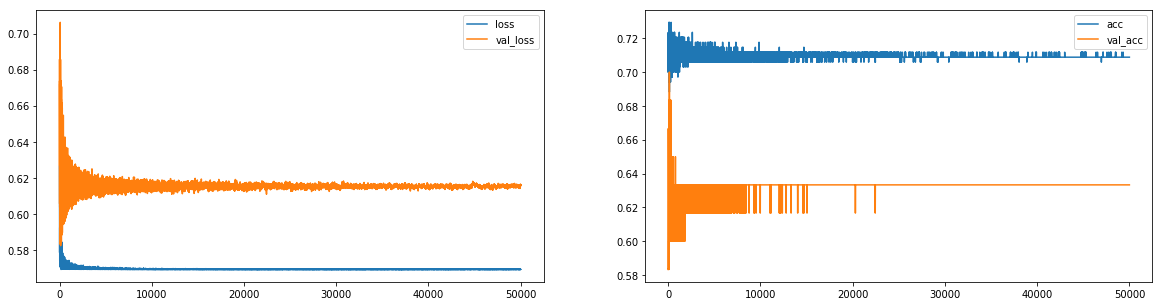

CPU times: user 8min 55s, sys: 2min 43s, total: 11min 39s
Wall time: 8min 23s


In [48]:
# Training the model
model = create_simplest_model(lr=0.1)
plot_losses = PlotLosses()
%time model.fit(X_train, y_train,epochs=50000, batch_size=100, verbose=0, validation_data=(X_test, y_test),callbacks=[plot_losses]) 

In [49]:
def print_results(model):
    # Evaluating the model on the training and testing set
    score = model.evaluate(X_train, y_train)
    print("\n Training Accuracy:", score)
    score = model.evaluate(X_test, y_test)
    print("\n Testing Accuracy:", score)
print_results(model)

 32/340 [=>............................] - ETA: 0s
 Training Accuracy: [0.56932514976052673, 0.70882352800930248]
32/60 [===============>..............] - ETA: 0s
 Testing Accuracy: [0.61569086710611975, 0.63333332141240439]


In [50]:
model.get_weights()

[array([[ 1.87787461],
        [ 1.65180016],
        [-2.1503942 ]], dtype=float32), array([-2.37439227], dtype=float32)]

In [70]:
def create_model(lr=0.01):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(3,)))
    #model.add(Dropout(.2))
    model.add(Dense(128, activation='relu'))
    #model.add(Dropout(.1))
    model.add(Dense(64, activation='relu'))
    #model.add(Dropout(.1))
    model.add(Dense(1, activation='sigmoid'))
    # Compiling the model
    rmsprop = optimizers.RMSprop(lr = lr, decay=1e-6)
    sgd = optimizers.SGD(lr=lr, decay=1e-2, momentum=0.9, nesterov=False)
    adam = optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0)
    model.compile(loss = 'binary_crossentropy', optimizer=rmsprop, metrics=['accuracy'])
    return model

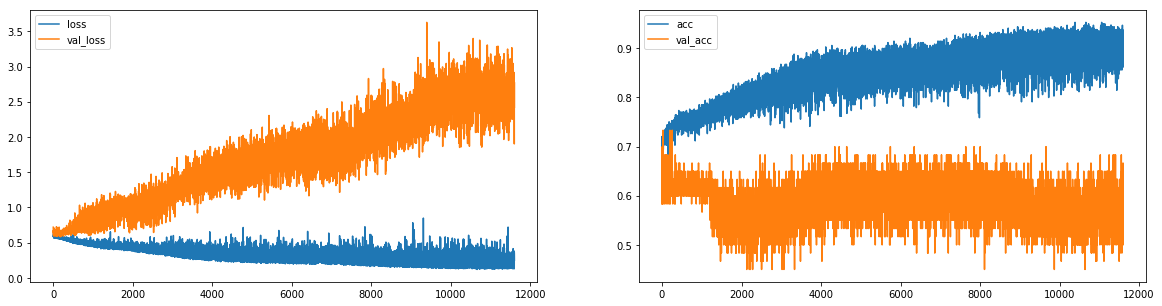

KeyboardInterrupt: 

In [71]:
# Training the model
complex_model = create_model(lr=0.01)
plot_losses = PlotLosses()
complex_model.fit(X_train, y_train, 
          epochs=100000, 
          batch_size=68, 
          verbose=0, 
          validation_data=(X_test, y_test),
          callbacks=[plot_losses])

In [57]:
print_results(complex_model)

 32/340 [=>............................] - ETA: 0s
 Training Accuracy: [0.067305083309902869, 0.97058823529411764]
32/60 [===============>..............] - ETA: 0s
 Testing Accuracy: [4.3696802139282225, 0.60000000397364295]


In [91]:
def create_regularization_model(lr=0.01):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(3,)))
    #model.add(BatchNormalization())
    #model.add(Dropout(.1))
    model.add(Dense(1, activation='sigmoid'))

    # Compiling the model
    rmsprop = optimizers.RMSprop(lr = 0.001, decay=1e-9)
    sgd = optimizers.SGD(lr=lr, decay=1e-2, momentum=0.9, nesterov=False)
    adam = optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0)
    model.compile(loss = 'binary_crossentropy', optimizer=rmsprop, metrics=['accuracy'])
    return model

In [92]:
#### Training the model
complex_reg_model = create_regularization_model(lr=0.0001)
plot_losses = PlotLosses()
complex_reg_model.fit(X_train, y_train, 
          epochs=100000, 
          batch_size=68, 
          verbose=0, 
          validation_data=(X_test, y_test),
          callbacks=[plot_losses])

KeyboardInterrupt: 

# Original example

In [62]:
data = pd.read_csv('admision-estudiantes.csv')
# remove NaNs
data = data.fillna(0)

# One-hot encoding the rank
#processed_data = pd.get_dummies(data, columns=['rank'])

# Normalizing the gre and the gpa scores to be in the interval (0,1)
#processed_data["gre"] = processed_data["gre"]/800
#processed_data["gpa"] = processed_data["gpa"]/4

X = np.array(data[["gre","gpa","rank"]])

X = normalize(X)
y = np.array(data["admit"])
# Splitting the data input into X, and the labels y 
#X = np.array(processed_data)[:,1:]
#X = X.astype('float32')
#y = keras.utils.to_categorical(data["admit"],2)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=8)

# print shape of training set
print('x_train shape:', X_train.shape)

# print number of training, validation, and test images
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape: (360, 3)
360 train samples
40 test samples


In [127]:
# Imports
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

# Building the model
# Note that filling out the empty rank as "0", gave us an extra column, for "Rank 0" students.
# Thus, our input dimension is 7 instead of 6.
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(3,)))
#model.add(Dropout(.2))
model.add(Dense(128, activation='relu'))
#model.add(Dropout(.1))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
rmsprop = optimizers.RMSprop(lr = 0.001, decay=0)
model.compile(loss = 'binary_crossentropy', optimizer=rmsprop, metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_94 (Dense)             (None, 256)               1024      
_________________________________________________________________
dense_95 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_96 (Dense)             (None, 1)                 129       
Total params: 34,049
Trainable params: 34,049
Non-trainable params: 0
_________________________________________________________________


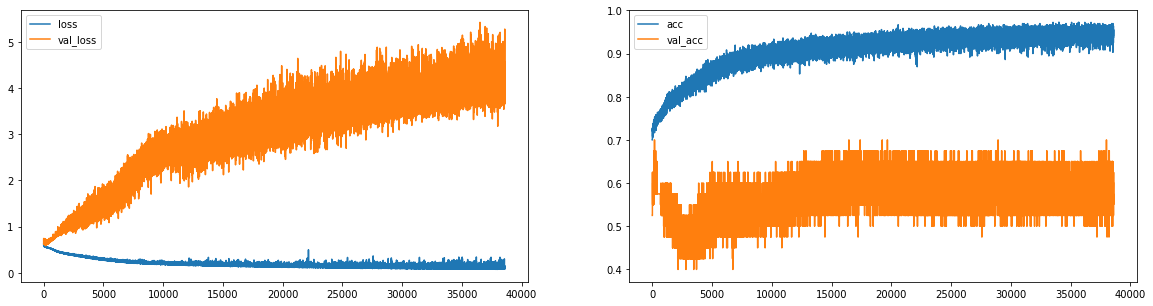

In [ ]:
# Training the model
#checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch.hdf5', 
#                               verbose=1, save_best_only=True)
# checkpointer va como una callback
model.fit(X_train, y_train, epochs=50000, batch_size=36, verbose=0, validation_data=(X_test, y_test), callbacks=[plot_losses])

In [125]:
# Evaluating the model on the training and testing set
score = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", score[1])
score = model.evaluate(X_test, y_test)
print("\n Testing Accuracy:", score[1])

 32/360 [=>............................] - ETA: 0s
 Training Accuracy: 0.830555555556
32/40 [=======================>......] - ETA: 0s
 Testing Accuracy: 0.55
